***
Implementing logistic regression and a basic optimization method for estimating the regression parameters.

Suppose some inputs $X \in \mathbb{R}^{N \times D}$ with $N$ observations and $D$ covariates.

The targets are $y \in \{0,1\}^{N}$.

Our regression parameters are $\beta \in \mathbb{R}^{D}$ and the link function between our linear model $X\beta$ and the targets is the logistic function $\sigma(X\beta) = \frac{1}{1+\exp{\{-X\beta\}}}$.

Assume that we have i.i.d. observations that follow a Bernoulli likelihood: $ L(\beta) = \prod_{i=1}^{N} \sigma(X_i\beta)^{y_i} (1-\sigma(X_i\beta))^{1-y_i} $.

*In logistic regression, we are maximizing the (log) likelihood.*

For the gradient of the log likelihood function with respect to the regression parameters, $\beta$:

$ \frac{d \log L_i(\beta)}{d \beta}= \frac{d}{d\beta} \sum_{i: y_i = 1} y_i \log \sigma(X_i \beta) + \sum_{i: y_i = 0} (1-y_i )\log (1- \sigma(X_i \beta))$.

$\frac{d \log L(\beta)}{d \beta}= \sum_{i: y_i = 1} \frac{y_i}{\sigma(X_i\beta)} \frac{d}{d\beta}\sigma(X_i\beta) - \sum_{i: y_i = 0} \frac{1-y_i}{1-\sigma(X_i\beta)}\frac{d}{d\beta}\sigma(X_i\beta)$

$\frac{d \log L(\beta)}{d \beta}= \sum_{i=1}^{N} \left( \frac{y_i- \sigma(X_i \beta)}{\sigma(X_i\beta)(1-\sigma(X_i\beta))} \right) \frac{d}{d\beta}\sigma(X_i\beta)$

$\frac{d \log L(\beta)}{d \beta}= \sum_{i=1}^{N} \left( \frac{y_i- \sigma(X_i \beta)}{\sigma(X_i\beta)(1-\sigma(X_i\beta))} \right) \frac{X_i \exp{ \{X_i \beta \}}}{(1+\exp{\{X_i \beta\}})^{2}}$

$\frac{d \log L(\beta)}{d \beta}= \sum_{i=1}^{N} \left( \frac{y_i- \sigma(X_i \beta)}{\sigma(X_i\beta)(1-\sigma(X_i\beta))} \right) X_i \sigma(X_i\beta)(1-\sigma(X_i\beta))$

$\frac{d \log L(\beta)}{d \beta}= \sum_{i=1}^{N} \left(y_i- \sigma(X_i \beta) \right) X_i $


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
#@pysnooper.snoop()
class LogisticRegression(object):

    def __init__(self, X, Y):
        """
        The __init__ method is called anytime you instantiate a class. This function should take in two arguemnts:
            X: A NxD dimensional real valued numpy array represeting the covariates.
            y: A N dimensional binary valued numpy array representing the targets.

        """
        self.X = X
        self.N, self.D = self.X.shape
        self.Y = Y
        assert(self.Y.size == self.N) # make sure y is the appropriate size

        # instantiate regression parameter objects
        self.beta = np.zeros(self.D)

    def log_likelihood(self, beta):
        sigma = expit(self.X @ beta)
        sigma = np.clip(sigma, 1e-6, 1 - (1e-6))
        LL = np.sum(self.Y * np.log(sigma) + (1.-self.Y) * np.log(1-sigma))
        return LL

    def grad_log_likelihood(self, beta):
        sigma = expit(self.X @ beta)
        sigma = np.clip(sigma, 1e-6, 1 - (1e-6))
        grad_LL = self.X.T.dot(self.Y - sigma) #/self.D  // ((self.Y - sigma)[:,None] * self.X).sum(axis=0)
        return grad_LL

    def fit(self, step=.01, iters=100000):
        # The "step" and "iters" are arguements you must have in the fit method
        # that tell you the step size of the optimizer and the number of
        # of iterations your optimizer should run.
        gradient_beta = self.grad_log_likelihood(self.beta)
        loglikelihood_loss = np.zeros(iters)
        for t in range(iters):

          gradient_beta = self.grad_log_likelihood(self.beta)
          self.beta += step * gradient_beta
          loglikelihood_loss[t] = self.log_likelihood(self.beta)

        beta = self.beta
        plt.plot(loglikelihood_loss)
        plt.title("Optimization Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("log_likelihood")
        plt.show()
        return beta

    def predict(self, X_test):
        """
        This function will take in some test set data "X_test" and return a predicted value
        """
        assert(X_test.shape[1] == self.D)
        predicted_values = expit(X_test @ self.beta)
        return predicted_values


Test out logistic regression Using the synthetic data generated in the below cell to test out,

The log likelihood should increase as the number of iterations increases.

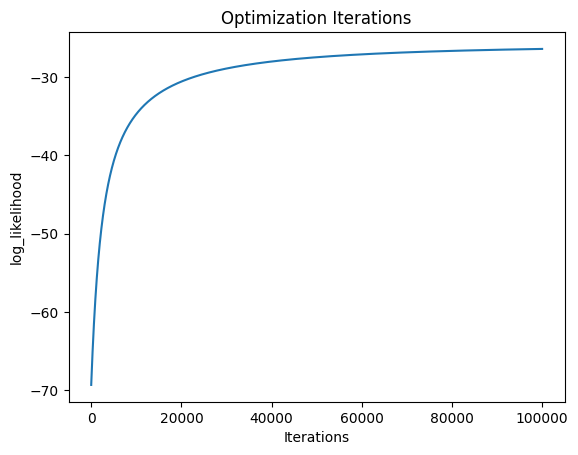

array([-0.42573053,  0.67153733,  3.10263162, -1.16592886,  1.16686942,
        0.51190545,  0.7515451 ,  1.16842763,  0.35394325,  0.52954544])

In [42]:
N = 100
D = 10
X = np.random.normal(size=(N,D))
beta0 = np.random.normal(size=D)
P = expit(X @ beta0)
Y = np.random.binomial(1,P)

LR = LogisticRegression(X=X,Y=Y)
step = 0.00001  # choose a step size
iters = 100000  # choose a number of iterations
LR.fit(step=step, iters=iters)

The "breast_cancer_dataset" from scikit learn and fit your logistic regression model on a training set consisting of the first 500 observations and evaluate the test set on the remaining data.

The cross entropy metric is equivalent to the negative Bernoulli log likelihood of the logistic regression model evaluated on the test data, divided by the number of test evaluations: $\text{CE}= -\frac{1}{N^{\ast}} \sum \log P(y_{i}^{\ast} | \beta, X, y, x_{i}^{\ast})$ for a test set size of $N^{\ast}$ with test set data $y^{\ast}$ and $X^{\ast}$.
https://en.wikipedia.org/wiki/Cross_entropy

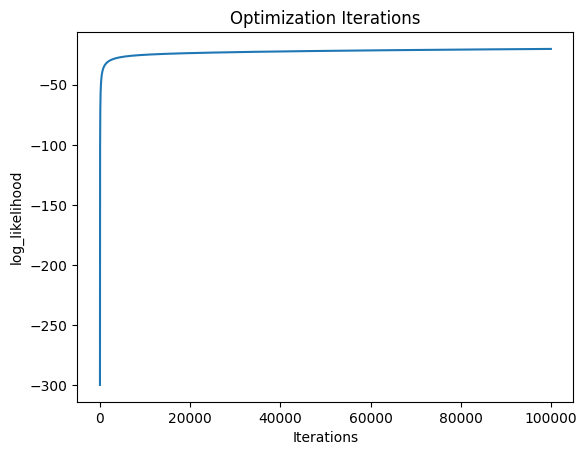

array([ 0.76065306, -0.05714087,  0.66940097,  0.20109162, -0.14088924,
        2.89410892, -1.88239702, -1.74676463,  0.41039874, -0.64030135,
       -3.26982711,  1.15518925, -0.33326142, -2.9137474 , -0.47922331,
        0.02773466,  1.5002661 , -1.82030103,  0.42660807,  2.13948332,
       -2.89664797, -2.9720322 , -2.07402301, -2.98517685, -0.77346084,
        0.94169365, -1.78272445, -1.27411237, -1.50563933, -1.69039079,
       -1.00104329])

In [44]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer['data']
# for numerical stability, standardize inputs
X -= X.mean(axis=0)
X /= X.std(axis=0)
# add intercept
X = np.hstack((X, np.ones((X.shape[0], 1))))
Y = breast_cancer['target']
X_train, X_test = X[:500], X[500:]
Y_train, Y_test = Y[:500], Y[500:]

LR = LogisticRegression(X=X_train,Y=Y_train)
step = 0.0001  # choose a step size
iters = 100000  # choose a number of iterations
LR.fit(step=step, iters=iters)

In [45]:
Y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [47]:
P_test = LR.predict(X_test)
LL = (Y_test * np.log(P_test)) + ( (1. - Y_test) * np.log(1. - P_test))
LL = -LL.mean()
print("Predictive Cross Entropy Error: %.2f" % LL)

Predictive Cross Entropy Error: 0.04


return the names of the most important covariates according to the absolute value of its regression weights

In [48]:
covariates = np.hstack((breast_cancer['feature_names'], 'intercept'))
print(covariates[np.argsort(np.abs(LR.beta))[::-1]]) # print the covariates in order of most to least important

['radius error' 'worst area' 'worst texture' 'area error' 'worst radius'
 'mean compactness' 'fractal dimension error' 'worst perimeter'
 'mean concavity' 'concave points error' 'worst concavity'
 'mean concave points' 'worst fractal dimension' 'worst symmetry'
 'concavity error' 'worst concave points' 'texture error' 'intercept'
 'worst compactness' 'worst smoothness' 'mean radius' 'mean perimeter'
 'mean fractal dimension' 'smoothness error' 'symmetry error'
 'mean symmetry' 'perimeter error' 'mean area' 'mean smoothness'
 'mean texture' 'compactness error']
